In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 1. 定义目标函数 f(x) = sin(x)
def func(x):
    return np.sin(x)

In [2]:
# 2. 生成训练数据和测试数据
# 训练数据 (x_train, y_train)
x_train = np.linspace(-10, 10, 500).reshape(-1, 1)  # 训练集：从 -10 到 10 生成 500 个数据点
y_train = func(x_train)  # 目标函数值

# 测试数据 (x_test, y_test)
x_test = np.linspace(-10, 10, 100).reshape(-1, 1)  # 测试集：从 -10 到 10 生成 100 个数据点
y_test = func(x_test)

# 转换为 PyTorch 张量
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [3]:
# 3. 构建神经网络 (两层 ReLU 网络)
class ReLU_Network(nn.Module):
    def __init__(self):
        super(ReLU_Network, self).__init__()
        # 输入层到隐藏层
        self.layer1 = nn.Linear(1, 64)  # 1维输入，64个隐藏神经元
        # 隐藏层到输出层
        self.layer2 = nn.Linear(64, 1)  # 64个隐藏神经元到1维输出

    def forward(self, x):
        x = torch.relu(self.layer1(x))  # 使用 ReLU 激活函数
        x = self.layer2(x)  # 输出层
        return x

In [4]:
# 4. 实例化网络和优化器
model = ReLU_Network()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # 使用Adam优化器
criterion = nn.MSELoss()  # 使用均方误差损失

In [10]:
# 5. 训练网络
num_epochs = 10000
losses = []

for epoch in range(num_epochs):
    model.train()
    
    # 前向传播
    y_pred = model(x_train_tensor)
    
    # 计算损失
    loss = criterion(y_pred, y_train_tensor)
    
    # 反向传播
    optimizer.zero_grad()  # 清除先前的梯度
    loss.backward()  # 计算梯度
    optimizer.step()  # 更新权重
    
    # 记录损失
    losses.append(loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [10/10000], Loss: 0.2135
Epoch [20/10000], Loss: 0.2117
Epoch [30/10000], Loss: 0.2099
Epoch [40/10000], Loss: 0.2081
Epoch [50/10000], Loss: 0.2064
Epoch [60/10000], Loss: 0.2047
Epoch [70/10000], Loss: 0.2031
Epoch [80/10000], Loss: 0.2015
Epoch [90/10000], Loss: 0.2000
Epoch [100/10000], Loss: 0.1985
Epoch [110/10000], Loss: 0.1970
Epoch [120/10000], Loss: 0.1956
Epoch [130/10000], Loss: 0.1942
Epoch [140/10000], Loss: 0.1929
Epoch [150/10000], Loss: 0.1916
Epoch [160/10000], Loss: 0.1903
Epoch [170/10000], Loss: 0.1891
Epoch [180/10000], Loss: 0.1879
Epoch [190/10000], Loss: 0.1867
Epoch [200/10000], Loss: 0.1855
Epoch [210/10000], Loss: 0.1844
Epoch [220/10000], Loss: 0.1833
Epoch [230/10000], Loss: 0.1822
Epoch [240/10000], Loss: 0.1812
Epoch [250/10000], Loss: 0.1801
Epoch [260/10000], Loss: 0.1791
Epoch [270/10000], Loss: 0.1781
Epoch [280/10000], Loss: 0.1772
Epoch [290/10000], Loss: 0.1762
Epoch [300/10000], Loss: 0.1753
Epoch [310/10000], Loss: 0.1744
Epoch [320/10000]

In [11]:
# 6. 用测试集评估模型
model.eval()
y_test_pred = model(x_test_tensor).detach().numpy()

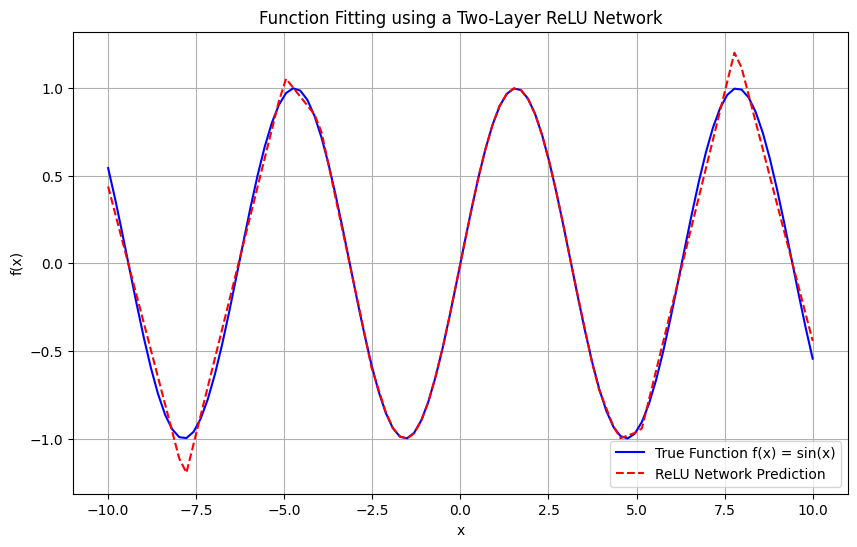

In [14]:
# 7. 绘制拟合效果
plt.figure(figsize=(10, 6))
plt.plot(x_test, y_test, label='True Function f(x) = sin(x)', color='blue')
plt.plot(x_test, y_test_pred, label='ReLU Network Prediction', color='red', linestyle='dashed')
plt.legend()
plt.title("Function Fitting using a Two-Layer ReLU Network")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()

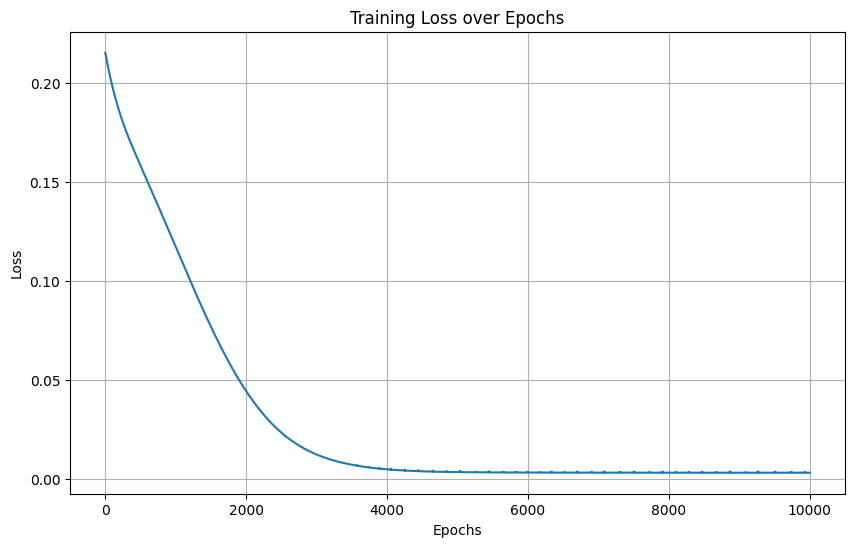

In [13]:
# 8. 显示训练损失曲线
plt.figure(figsize=(10, 6))
plt.plot(np.arange(num_epochs), losses)
plt.title("Training Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()